# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [33]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [34]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [35]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [36]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [37]:
#
totalride=pyber_data_df.groupby(["type"]).count()["ride_id"]
totalride


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [38]:
# 2. Get the total drivers for each city type
totaldriver=city_data_df.groupby(["type"]).sum()["driver_count"]


In [39]:
#  3. Get the total amount of fares for each city type
totalfare=pyber_data_df.groupby(["type"]).sum()["fare"]
totalfare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [40]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride=totalfare/totalride

In [41]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=totalfare/totaldriver


In [42]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df1=pd.DataFrame([totalride, totaldriver,totalfare,average_fare_per_ride,average_fare_per_driver])
pyber_summary_df2=pyber_summary_df1.transpose()


pyber_summary_df=pyber_summary_df2.rename(columns={"ride_id": "Total Ride", "driver_count": "Total Drive","fare":"Total Fare",
                   "Unnamed 0":"Average Fare per Ride","Unnamed 1":"Average Fare per Driver"})
pyber_summary_df

,Total Ride,Total Drive,Total Fare,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125.0,78.0,4327.93,34.623440,55.486282
Suburban,625.0,490.0,19356.33,30.970128,39.502714
Urban,1625.0,2405.0,39854.38,24.525772,16.571468


In [43]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Ride,Total Drive,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125.0,78.0,4327.93,34.623440,55.486282
Suburban,625.0,490.0,19356.33,30.970128,39.502714
Urban,1625.0,2405.0,39854.38,24.525772,16.571468


In [44]:
#  8. Format the columns.
pyber_summary_df["Total Ride"]=pyber_summary_df["Total Ride"].map("{:,.0f}".format)
pyber_summary_df["Total Drive"]=pyber_summary_df["Total Drive"].map("{:,.0f}".format)
pyber_summary_df["Total Fare"]=pyber_summary_df["Total Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df



,Total Ride,Total Drive,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [45]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [46]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
totalfare1=pyber_data_df.groupby(["type","date"]).sum()["fare"]
totalfare1

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [47]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
totalfare1 = totalfare1.reset_index()
totalfare1

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [48]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
totalfare1_date= totalfare1.pivot(index="date", columns="type", values='fare')
totalfare1_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [49]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
totalfare1_somedates=totalfare1_date.loc['2019-01-01':'2019-04-29']
totalfare1_somedates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [50]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
totalfare1_somedates.index = pd.to_datetime(totalfare1_somedates.index)

In [51]:
# 7. Check that the datatype for the index is datetime using df.info()
totalfare1_somedates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [56]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_resfare_data = totalfare1_somedates.resample('W').sum()
weekly_resfare_data.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


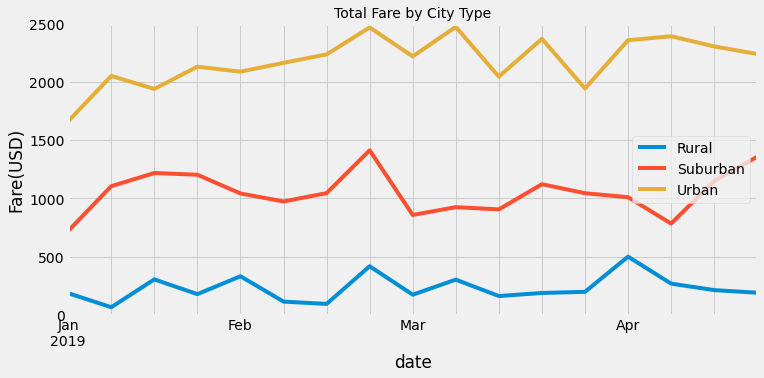

In [97]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import numpy as np
ax =weekly_resfare_data.plot(xticks=weekly_resfare_data.index, ylabel="Fare(USD)",figsize=[11,5],ylim=[0,2500])
ax.set_title('Total Fare by City Type',fontsize=14)
plt.legend()
plt.show()
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

